# 1. Crea una caja en 2d de tamaño 1000 con las siguientes distribuciones

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math

## a) Puntos en una malla cuadriculada de distancia (MxM cada retícula)

Definimos algunos parametros que nos serviran para construir la caja. Los puntos no deben estar en el borde de la caja.

In [2]:
separacion = 25
longitud = 1000

Definimos una funcion para construir una caja con una longitud "l" y una separacion "s".

In [64]:
def construyecaja (l, s):
    nxlado = int(l / s)
    ntot = nxlado ** 2
    px = []
    py = []
    c = 1
    for i in range(1, nxlado):
        for j in range(1, nxlado):
            px.append(separacion * i)
            py.append(separacion * j)
            c += 1
    return px, py        

Evaluamos la funcion para construir la caja

In [65]:
x, y = construyecaja(longitud, separacion)

Graficamos los puntos generados, tambien se grafican los 'bordes' de la cja

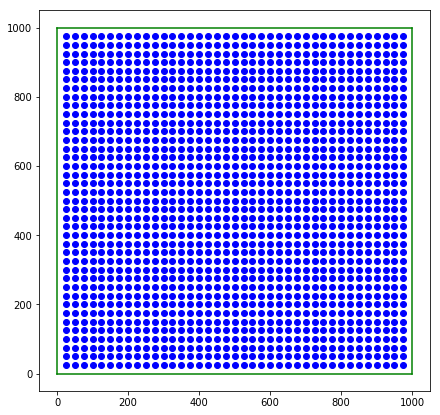

In [66]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x,y, "bo")

## b) 1000 puntos sobre un disco de radio 300.

Definimos algunos parametros para construir el disco

In [3]:
radio = 300
n = 1000

Definimos una funcion para construir un disco de 'n' puntos y de radio 'r'

In [6]:
def construyedisco(radio, n):
    xx1 = []
    yy1 = []
    u = 0
    while u < (n):
        fx = np.random.uniform(-radio, radio)
        fy = np.random.uniform(-radio, radio)
        rad = math.sqrt(math.pow(fx, 2) + math.pow(fy, 2))
        if rad <= radio:
            xx1.append(fx)
            yy1.append(fy) 
            u += 1
    return xx1, yy1

Evaluamos la funcion

In [ ]:
xx1, yy1 = construyedisco(radio, n)

Graficamos los puntos generados

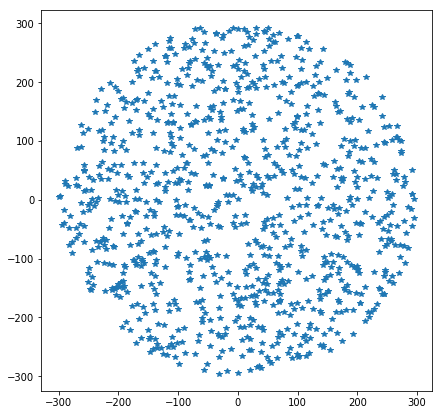

In [12]:
plt.figure(figsize=(7, 7))
plt.plot(xx1,yy1, "*")

## c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290

Definimos algunos parametros para construir el anillo.

In [3]:
radio = 300
radioint = 290
n = 1000

Definimos una funcion para construir un anillo de 'n' puntos,  radio mayor 'radio' y radio menor 'radioint'

In [4]:
def construyeanillo(radio, radioint, n):
    xx2 = []
    yy2 = []
    u = 0
    while u < (n):
        fx = np.random.uniform(-radio, radio)
        fy = np.random.uniform(-radio, radio)
        rad = math.sqrt(math.pow(fx, 2) + math.pow(fy, 2))
        if rad <= radio:
            if rad >= radioint:
                xx2.append(fx)
                yy2.append(fy)
                u += 1
    return xx2, yy2

Evaluamos la funcion

In [5]:
xx2, yy2 = construyeanillo(radio, radioint, n)

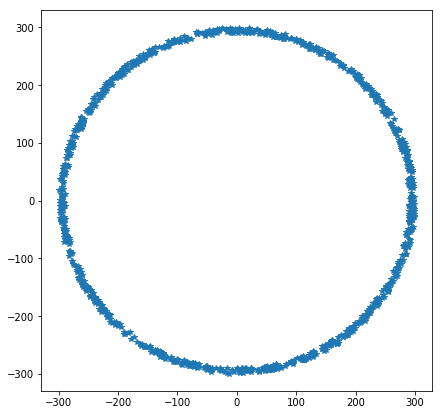

In [6]:
plt.figure(figsize=(7, 7))
plt.plot(xx2,yy2, "*")

## d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

Definimos algunos parametros para construir la caja

In [3]:
nanillos = 50
pxanillo = 100
ranillos = 40

Definimos una funcion para construir un anillo de radio 'r' conformado por 'n' puntos

In [4]:
def construyearo(r, n):
    xx = []
    yy = []
    da = 360/n
    for i in range(0, n):
        fx = r * math.cos((i * da)*np.pi/180)
        fy = r * math.sin((i * da)*np.pi/180)
        xx.append(fx)
        yy.append(fy) 
    return xx, yy

Definimos una funcion para construir anillos de forma aleatoria dentro de la caja

In [5]:
def esparceanillos(nanillos, longcaja, radioaros, pxanillo):
    px, py = construyearo(radioaros, pxanillo)
    x = []
    y = []
    for i in range(0, nanillos):
        centrox = np.random.uniform(-longcaja/2, longcaja/2)
        centroy = np.random.uniform(-longcaja/2, longcaja/2)
        for j in range(0, pxanillo):
            mx = px[j] + centrox
            my = py[j] + centroy
            x.append(mx)
            y.append(my)
    return x, y

In [6]:
longitud = 1000
x9, y9 = esparceanillos(nanillos, longitud, 300, pxanillo)

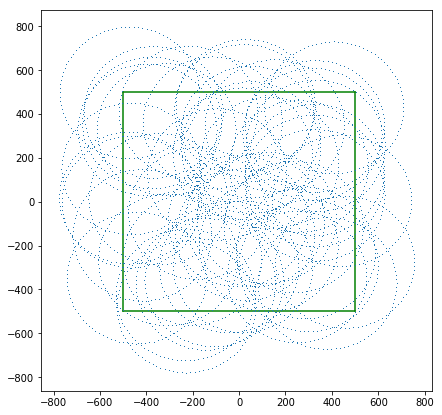

In [7]:
q1 = np.linspace(-longitud/2, -longitud/2, 2)
q2 = np.linspace(-longitud/2, longitud/2, 2)
q3 = np.linspace(longitud/2, longitud/2, 2)

plt.figure(figsize=(7, 7))

plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x9,y9, ",")


# 2. Haz un algoritmo que calcule la función de correlación con DD/RR-1 con el mismo número de puntos aleatorios que datos, y comprueba que si usas muestras aleatorias la función de correlación es cero. Cambia el número de puntos y el tamaño de *bin*, y observa qué ocurre.